<a href="https://colab.research.google.com/github/Mayorbytes/Zidio-CVD-Project/blob/main/Zidio_CVD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zidio CVD Project**


## Import Packages, Class and Functions

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

## **Load data**

In [226]:
data_url = "https://raw.githubusercontent.com/Mayorbytes/Zidio-CVD-Project/main/Heart_data.csv"
df = pd.read_csv(data_url)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
1588,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
1589,56.0,0.0,NaN,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
1590,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


## **Data Exploration**

In [227]:
print("The shape of the dataset:", df.shape)

The shape of the dataset: (1592, 14)


In [228]:
print(df.info(), "\n\nDataset description:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.2 KB
None 

Dataset description:
                age         sex           cp     trestbps         chol  \
count  1513.000000  1561.00000  1433.000000  1592.000000  1529.000000   
mean     54.427627     0.68802     1.7313

## **Data Preprocessing**

### **Finding missing values**

In [229]:
df.isnull().any(axis=0)

age          True
sex          True
cp           True
trestbps    False
chol         True
fbs          True
restecg      True
thalach     False
exang        True
oldpeak      True
slope        True
ca          False
thal         True
target      False
dtype: bool

In [230]:
print("Sum of missing values per column:\n", df.isnull().sum())

Sum of missing values per column:
 age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64


### **Handling missing values**

#### Continous variables

In [231]:
cont_num_var = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
cont_num_var

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,NaN
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4
...,...,...,...,...,...
1587,52.0,172.0,199.0,162.0,0.5
1588,44.0,120.0,263.0,173.0,0.0
1589,56.0,140.0,294.0,153.0,1.3
1590,57.0,140.0,192.0,148.0,0.4


In [232]:
for i in cont_num_var:
    df[i].fillna(df[i].mean(), inplace=True)
cont_num_var

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,NaN
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4
...,...,...,...,...,...
1587,52.0,172.0,199.0,162.0,0.5
1588,44.0,120.0,263.0,173.0,0.0
1589,56.0,140.0,294.0,153.0,1.3
1590,57.0,140.0,192.0,148.0,0.4


#### Categorical Variables (binary and multi-class)

In [233]:
columns_to_drop = cont_num_var.columns.tolist() + ["target"]
categ_var = df.drop(columns=columns_to_drop)
categ_var

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0
3,1.0,3.0,0.0,NaN,0.0,3.0,0.0,3.0
4,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...
1587,1.0,3.0,1.0,0.0,0.0,1.0,0.0,7.0
1588,1.0,2.0,0.0,0.0,0.0,1.0,0.0,7.0
1589,0.0,NaN,0.0,2.0,0.0,2.0,0.0,3.0
1590,1.0,4.0,0.0,0.0,0.0,2.0,0.0,6.0


In [234]:
for j in categ_var:
    df[j].fillna(df[j].mode().iloc[0], inplace=True)
categ_var.head(20)

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0
3,1.0,3.0,0.0,NaN,0.0,3.0,0.0,3.0
4,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0
5,1.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0
6,0.0,4.0,0.0,2.0,0.0,3.0,2.0,3.0
7,0.0,4.0,0.0,0.0,1.0,1.0,0.0,3.0
8,1.0,4.0,0.0,2.0,0.0,2.0,1.0,7.0
9,NaN,4.0,1.0,2.0,1.0,3.0,0.0,7.0


In [235]:
df.isnull().any(axis=0)

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### **Conversion of Dichotomous Float Variables to Integer"**


In [236]:
#sex
df["sex"] = df["sex"].astype(int)
#fbs
df["fbs"] = df["fbs"].astype(int)
#exang
df["exang"] = df["exang"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1592 non-null   float64
 1   sex       1592 non-null   int64  
 2   cp        1592 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1592 non-null   float64
 5   fbs       1592 non-null   int64  
 6   restecg   1592 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1592 non-null   int64  
 9   oldpeak   1592 non-null   float64
 10  slope     1592 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1592 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 174.2 KB


###**Handling Non-Dichotomous Target Variable**



In [237]:
unique_value_count = df["target"].value_counts()
print(f"Number of unique values in target: \n{unique_value_count}" )

Number of unique values in target: 
1    730
0    659
2    155
3     35
4     13
Name: target, dtype: int64


In [238]:
df = df[df["target"].isin([0,1])]
df["target"].describe()

count    1389.000000
mean        0.525558
std         0.499526
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

### **Data Separation**

In [239]:
x = df.drop(columns=["target"])
y = df["target"]

## **Data Visualization**

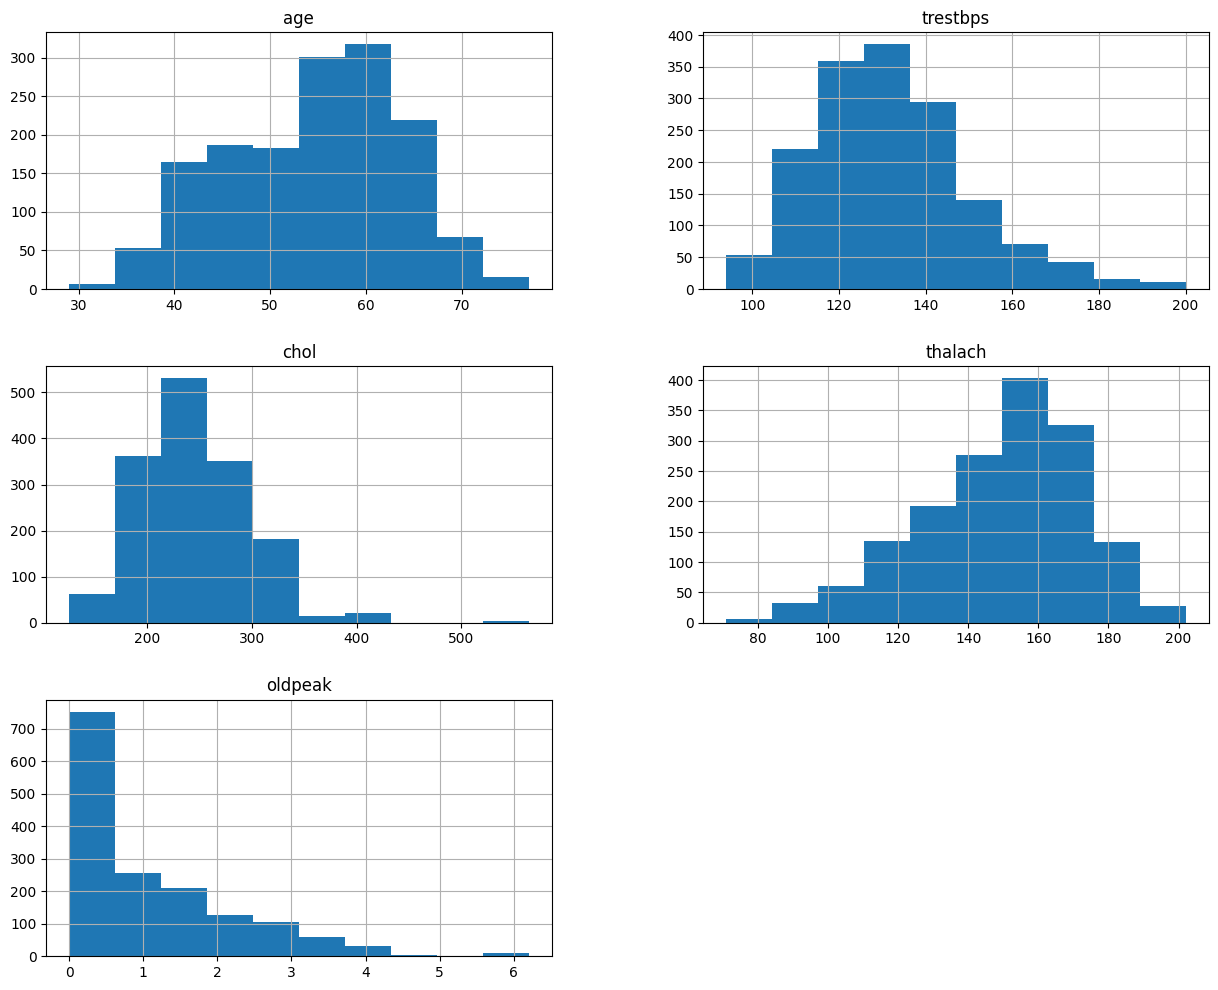

In [240]:
cont_num_var.hist(figsize=(15, 12))
plt.show()

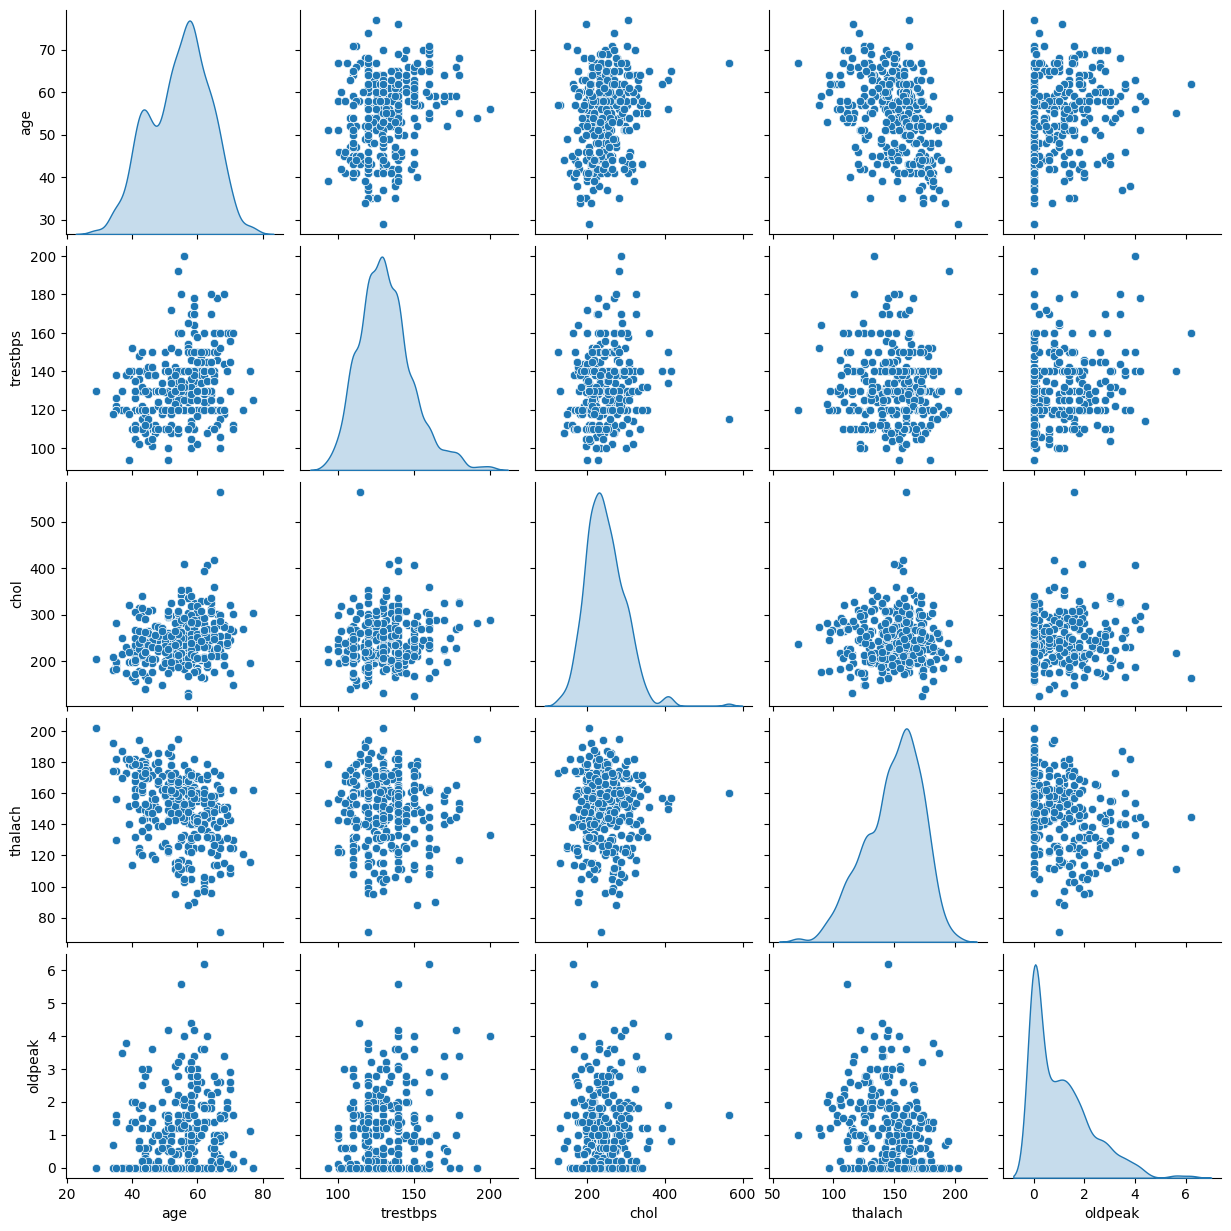

In [241]:
sns.pairplot(cont_num_var, diag_kind="kde")
plt.show()

## **Correlation Matrix**

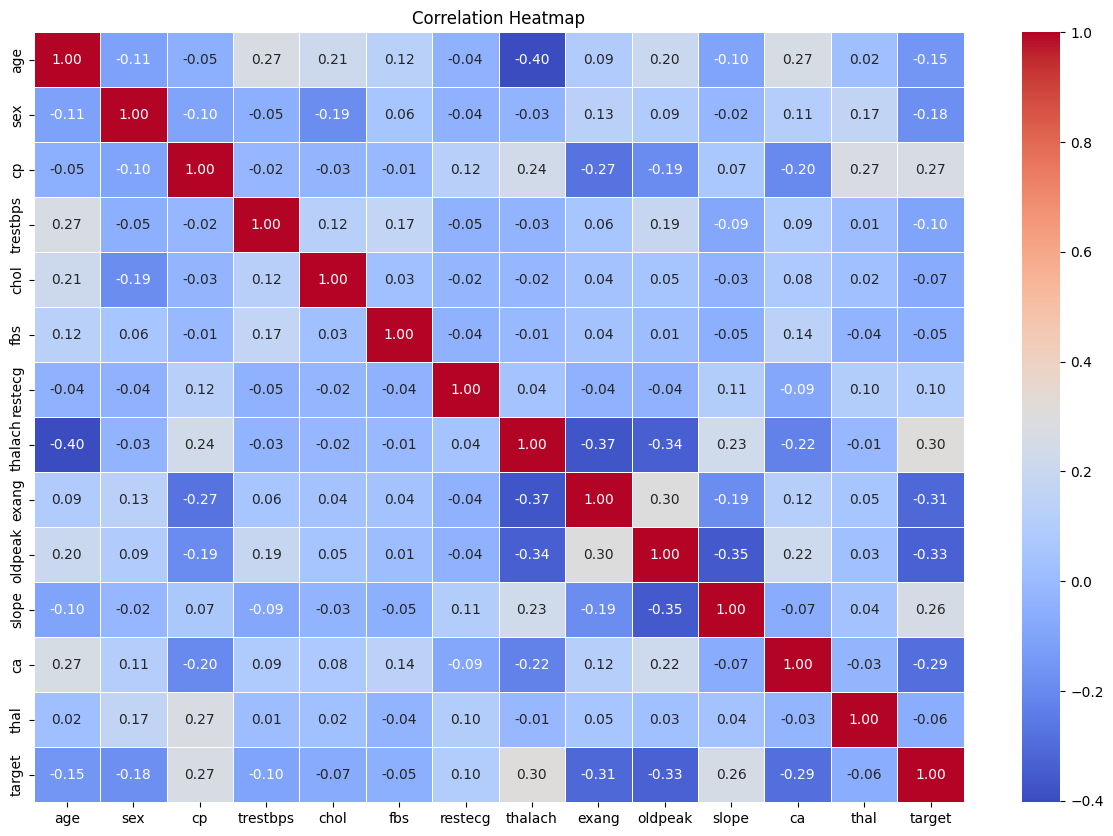

In [242]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## **Data Splitting**

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

### **Standardizing Variable**

In [244]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

## **Model Building**

In [245]:
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

In [246]:
results = {}
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    results[model_name] ={"Accuracy":accuracy, "Recall":recall, "Precision":precision, "AUC":auc}

### **Summary Table**

In [247]:
summary_df = pd.DataFrame(results)

### **Best Perfoming Model**

In [248]:
best_model = summary_df.mean().idxmax()
print("Performance metrics for each Model:")
print(summary_df)
print("\nBest-Performing mMdel:", best_model)


Performance metrics for each Model:
           Random Forest       SVM  k-Nearest Neighbors  Logistic Regression  \
Accuracy        0.784173  0.820144             0.773381             0.755396   
Recall          0.785714  0.935714             0.807143             0.814286   
Precision       0.785714  0.761628             0.758389             0.730769   
AUC             0.784161  0.819306             0.773137             0.754969   

           Gradient Boosting  
Accuracy            0.762590  
Recall              0.814286  
Precision           0.740260  
AUC                 0.762215  

Best-Performing mMdel: SVM
